Abhinand Satish - Nuclear Instrumentation and measurement Project 1

In [40]:
%pip install beautifulsoup4 requests pandas numpy


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 186 kB 6.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:

import matplotlib.pyplot as plt
import os
import sys
import csv

In [33]:
#Load print the text file /Users/abhinandsatish/Documents/2025/Spring/NIM/7314376.txt

path, dirs, files = next(os.walk("./"))   # 'This Folder'
file_count = len(files)
### Reading input
Data_store = [[],[]]
with open("7314376.txt") as f:
    lines = f.readlines()
    for line in lines[0:2]:
        Data_store[0].append(str(line.split()[0]))
        Data_store[1].append(str(line.split()[1]))
    for line in lines[2:]:
        Data_store[0].append(float(line.split()[0]))
        Data_store[1].append(float(line.split()[1]))
    f.close()
    
#create a downlodable csv file
with open('7314376.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['x', 'y'])
    for i in range(len(Data_store[0])):
        writer.writerow([Data_store[0][i],Data_store[1][i]])
    file.close()
    


Text(0, 0.5, 'Emission intensity_[%]')

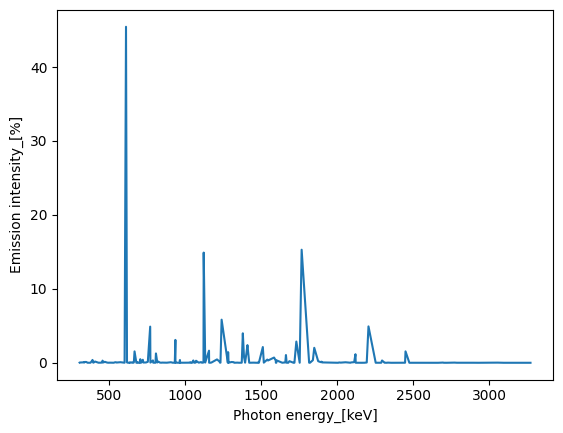

In [37]:
#plot the csv file, the first two lines are the title and the x and y axis
plt.plot(Data_store[0][2:],Data_store[1][2:])
#label the x and y axis
plt.xlabel(Data_store[0][0]+" "+Data_store[0][1])
plt.ylabel(Data_store[1][0]+" "+Data_store[1][1])


ASSUMPTIONS:
1. The radioisotope is a point source.
2. The intrinsic detection efficiency is 1.
3. The detector is fast enough such that no counts are lost due to deadtime.
4. The detector is a 3” diameter cylindrical detector that is facing the point source.
5. We will assume that we have good geometry due to a series of collimators installed
in our experimental facility (ignore buildup factors).
6. The source has an activity of 1 Ci, and the rate of activity change is negligible over the
course of the experiment.




**$I = I_0 e^{-\mu x}$**
Linear Attenuation coefficient  = **$\mu = \left(\frac{\mu}{\rho}\right) \times \text{density}$**
where **$\left(\frac{\mu}{\rho}\right)$** is the mass attenutation which I would derive from the NIST database

The density for Led and Aluminium is:

Lead (Pb) = 11.34 g/cm^3

Aluminium(Al) = 2.7g/cm^3